In [4]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

In [5]:
data_face = np.genfromtxt("data/faces.csv", delimiter=",")
n, d = data_face.shape

In [6]:
X = np.matrix(data_face)
Sigma = np.matmul(np.transpose(X), X) / n
eigenvalues, eigenvectors = np.linalg.eig(Sigma)

In [7]:
eigenvalues = np.real(eigenvalues)
trace = np.trace(Sigma)

In [8]:
idx = [0,1,9,29,49]
print((np.real(eigenvalues[idx])))
print('{:1f}'.format(trace))

[7.81812699e+02 1.61151575e+02 3.33958675e+00 8.09087790e-01
 3.89577740e-01]
1084.207435


In [26]:
k = list(range(1,51))
recons_error = [1 - np.sum(eigenvalues[:x])/trace for x in k]

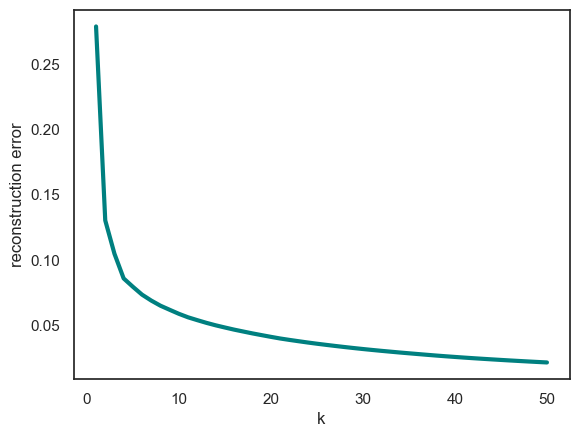

In [48]:
#make a plor of k, recons_error using seaborn
sns.set(style = "white")
#remover top and right spines
sns.despine()
#plot the data, strokewidth =2 and color = teal
sns.lineplot(x = k, y = recons_error, color = "teal", linewidth = 3)
#add axis labels
plt.xlabel("k")
plt.ylabel("reconstruction error")
#save the figure
plt.savefig("reconstruction_error.png",dpi=300)

# fig, ax = plt.subplots()
# plt.plot(k, recons_error)
# plt.grid(axis = "y")
# plt.xlabel("Num of Eig")
# plt.ylabel("Fractional Reconstruction Error")
# plt.savefig("reconstruction_error.png")

In [13]:
top50_vec = np.real(eigenvectors[:,range(50)])

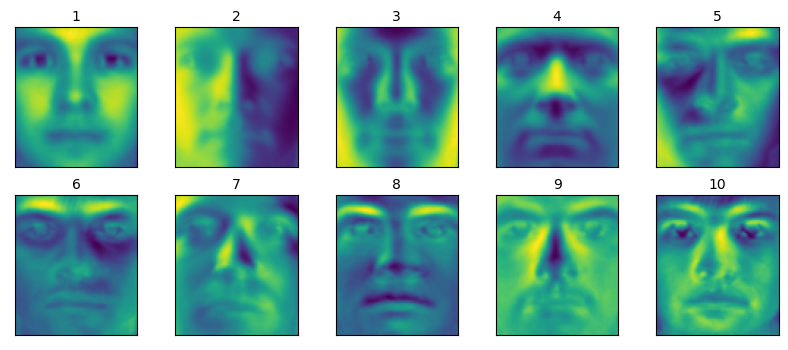

In [14]:
fig, axes = plt.subplots(nrows = 2, ncols = 5, figsize = (10,4))
for i in range(2):
    for j in range(5):
        axes[i][j].imshow(np.transpose(top50_vec[:,5*i + j].reshape(84,96)))
        axes[i][j].set_xticks([])
        axes[i][j].set_yticks([])
        axes[i][j].text(0.5, 1.05, str(5*i + j + 1), 
                        horizontalalignment='center', 
                        transform=axes[i][j].transAxes)
fig.savefig("top_10_eigenvectors.png")

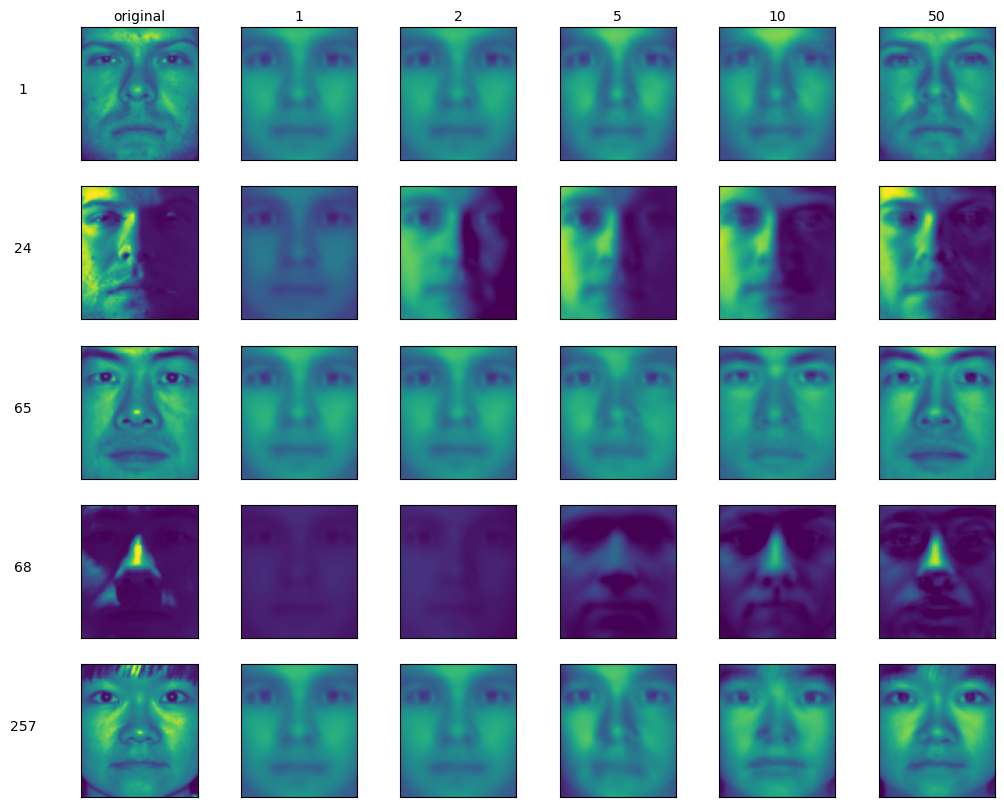

In [20]:

fig, axes = plt.subplots(nrows = 5, ncols = 6, figsize= (12,10))
idx = [0,23,64,67,256]
origin_faces = X[idx,:]
for iii in range(len(idx)):
    axes[iii][0].imshow(np.transpose(origin_faces[iii,:].reshape(84,96)),vmin = 0, vmax = 1)
    axes[iii][0].set_xticks([])
    axes[iii][0].set_yticks([])
for col_idx, k in enumerate([1,2,5,10,50]):
    U = top50_vec[:,range(k)]
    recon_matrix = np.matmul(U, U.transpose())
    recon_faces = np.matmul(recon_matrix, origin_faces.transpose())
    for row_idx in range(len(idx)):
        axes[row_idx][col_idx + 1].imshow(np.transpose(recon_faces[:,row_idx].reshape(84,96)),vmin = 0, vmax = 1)
        axes[row_idx][col_idx + 1].set_xticks([])
        axes[row_idx][col_idx + 1].set_yticks([])

# add "original, 1, 2, 5, 10, 20, 50" to the top row 
col_names = ["original", "1", "2", "5", "10", "50"]
for i in range(6):
    axes[0][i].text(0.5, 1.05, str(col_names[i]), 
                    horizontalalignment='center', 
                    transform=axes[0][i].transAxes)
# add text to the left column
row_names = ["1", "24", "65", "68", "257"]
for i in range(5):
    axes[i][0].text(-0.5, 0.5, str(row_names[i]), 
                    horizontalalignment='center', 
                    transform=axes[i][0].transAxes)

fig.savefig("reconstruction_faces.png")